In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["mathtext.fontset"] = 'cm'

from symphony import *

In [4]:
# MPS file
model_path = "/home/feb223/rvf/pySYMPHONY/example/RVF_example.MPS"

In [5]:
# RHS vector (m = 1)
zeta_lst = np.linspace(-56.5, 5, 2000)

# Create SYMPHONY environment
sym = Symphony()

# Set additional parameters
sym.set_param("verbosity", -2)

# Load the problem
if (sym.read_mps(model_path)):
    print("Model could not be loaded!\n")

# Enable Warm Start
sym.enable_warm_start()

In [6]:
cold_sym = Symphony()

# Set additional parameters
cold_sym.set_param("verbosity", -2)

# Enable Warm Start
cold_sym.enable_warm_start()

# Load the problem
if (cold_sym.read_mps(model_path)):
    print("Model could not be loaded!\n")

In [7]:
def plot_rvf(zeta_lst):
    """
    Evaluates the RVF at each zeta in zeta_lst
    using a "cold" (i.e. w/o warm start enabled)
    symphony environment. It plots the resulting
    function. 
    
    Assumes cold_sym is already defined.
    
    Args:
        zeta_lst: List of zetas. Assumes the 0-th
                  row corresponds to the second obj func.
    Returns:
        y_lst: list of values RVF(zeta) for zeta in zeta_lst
    """
    y_lst = []

    for zeta in zeta_lst:
        cold_sym.set_row_upper(0, zeta)
        if (cold_sym.solve() == FUNCTION_TERMINATED_ABNORMALLY):
            print("Something went wrong!")
            break
        else:
            objval = cold_sym.get_obj_val()
            y_lst.append(objval)

    plt.plot(zeta_lst, y_lst, c="purple", label='$z(\zeta)$')
    plt.legend()
    plt.xlabel(r"$\zeta$")
    plt.ylabel("Value Function")
    return y_lst
    


def plot_df(zeta, zeta_lst, rvf_lst=[], print_df=False, filename=''):
    """
    Evaluates the RVF at zeta using a "warm" 
    (i.e. warm start enabled) symphony environment. 
    Then, it updates the dual function from the current B&B.
    Eventaully, it evaluates the dual function at all
    zetas in zeta_lst and plots the resulting function.
    
    Assumes sym is already defined and warm start has 
    been enabled.
    
    Args:
        zeta: RHS at which build/update the dual funcion. 
              Assumes the 0-th row corresponds to the second obj func.
        zeta_lst: List of zetas. Assumes the 0-th
                  row corresponds to the second obj func.
        rvf_lst: List of values of the RVF. If provided, it is plotted
                 along with the dual function. 
                 Assumes len(rvf_lst) == len(zeta_lst).
        print_df: if true, it prints the dual function description.
    """

    sym.set_row_upper(0, zeta)
    if (sym.warm_solve() == FUNCTION_TERMINATED_ABNORMALLY):
        print("Something went wrong!")

    sym.build_dual_function()

    if print_df:
        obj = sym.get_obj_val()
        print("=======================")
        print("OPT OBJ: %.5f" % obj) 
        print("=======================")
        sym.print_dual_function()
    
    y_lst_df_1 = []
    
    for zeta in zeta_lst:
        val = sym.evaluate_dual_function([zeta])
        y_lst_df_1.append(val)
    
    plt.plot(zeta_lst, y_lst_df_1, c="red", linewidth=0.5, label=r'$RVF_{LB}^1$')
    if rvf_lst:
        plt.plot(zeta_lst, rvf_lst, c="purple", label='$z(\zeta)$')
    plt.legend()
    plt.xlabel(r"$\zeta$")
    plt.ylabel("Value Function")
    if filename:
        plt.savefig(filename)

# Plot for $\zeta \in [-56.5, 5]$

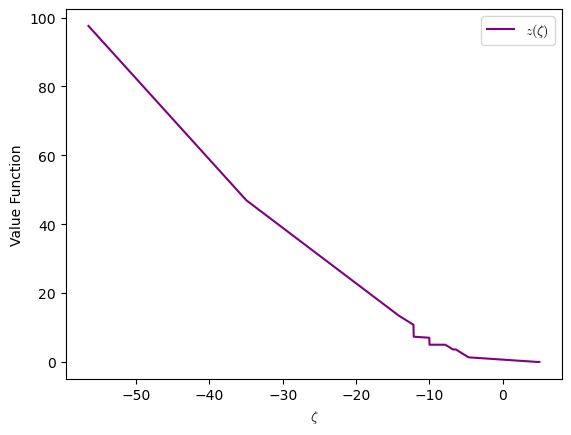

In [8]:
rvf_lst = plot_rvf(zeta_lst)

OPT OBJ: 0.00000
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


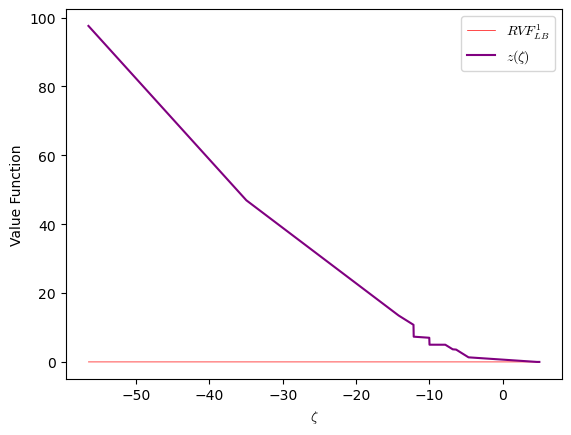

In [9]:
plot_df(40/9, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 95.23529
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


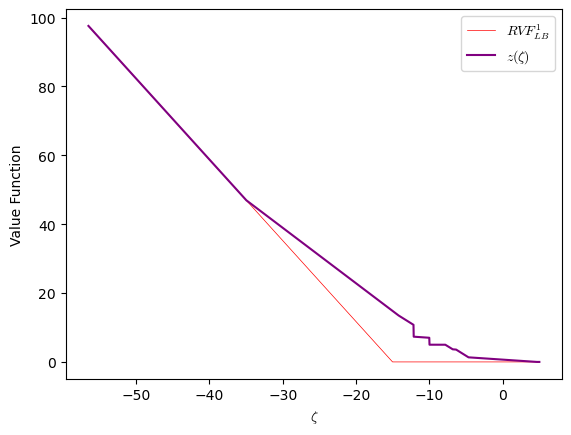

In [10]:
plot_df(-55.5, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 7.33333
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


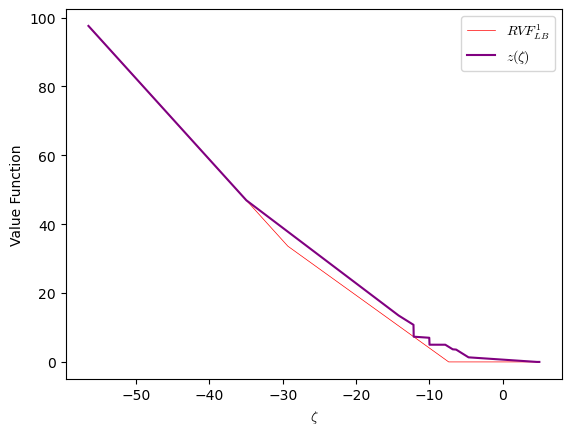

In [11]:
plot_df(-73/6, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 5.00000
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
0 : -0.6875000000, 1 : -0.4687500000, 4 : 0.8437500000, 6 : 11.0937500000, 7 : 2.9062500000, 8 : 11.6250000000, 10 : 9.4375000000, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


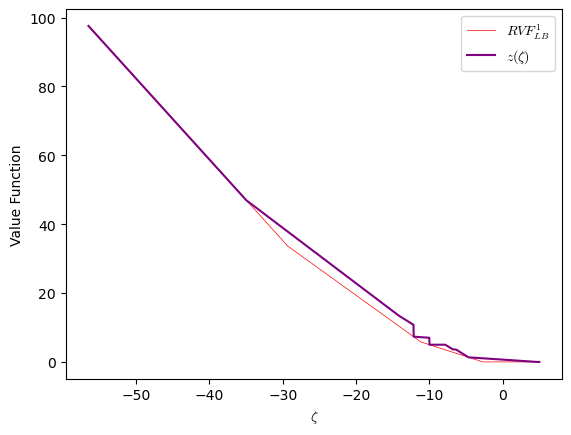

In [12]:
plot_df(-10, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 7.16260
RAYS
0.1351817727 0.1577120682 0.6083179772 0.7660300454 -0.2928938409 6.1507706587 2.7712263407 0.0000000000 0.4506059091 0.0000000000 -0.0000000000 
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
0 : -0.6875000000, 1 : -0.4687500000, 4 : 0.8437500000, 6 : 11.0937500000, 7 : 2.9062500000, 8 : 11.6250000000, 10 : 9.4375000000, 
------------------------
0 : -1.0769230769, 1 : -0.9230769231, 3 : -0.4153846154, 6 : 19.0769230769, 7 : 1.1538461538, 8 : 12.9230769231, 10 : 7.6461538462, 
------------------------
0 : -

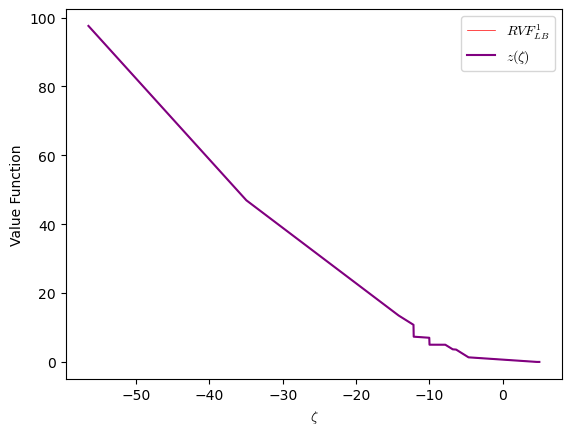

In [13]:
plot_df(-11, zeta_lst, rvf_lst=rvf_lst, print_df=True)

# Plot for $\zeta \in [-16, 5]$

In [14]:
# RHS vector (m = 1)
zeta_lst = np.linspace(-16, 5, 2000)

# Create SYMPHONY environment
sym = Symphony()

# Set additional parameters
sym.set_param("verbosity", -2)

# Load the problem
if (sym.read_mps(model_path)):
    print("Model could not be loaded!\n")

# Enable Warm Start
sym.enable_warm_start()

In [15]:
cold_sym = Symphony()

# Set additional parameters
cold_sym.set_param("verbosity", -2)

# Enable Warm Start
cold_sym.enable_warm_start()

# Load the problem
if (cold_sym.read_mps(model_path)):
    print("Model could not be loaded!\n")

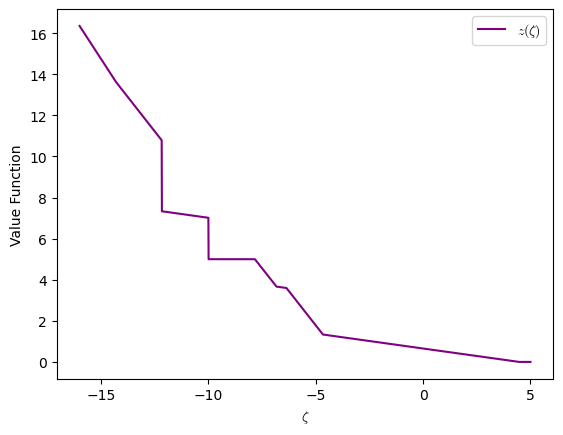

In [16]:
rvf_lst = plot_rvf(zeta_lst)

OPT OBJ: 0.00000
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


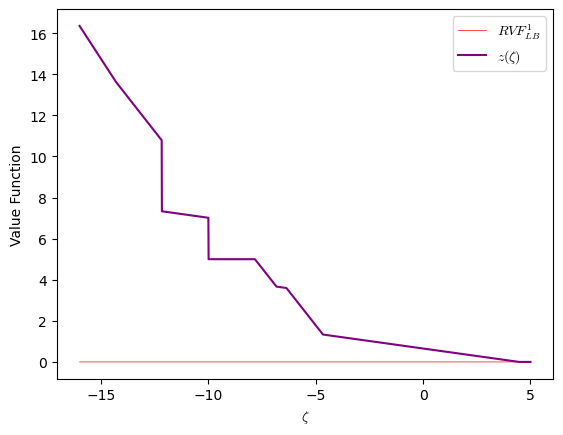

In [17]:
plot_df(40/9, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 95.23529
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


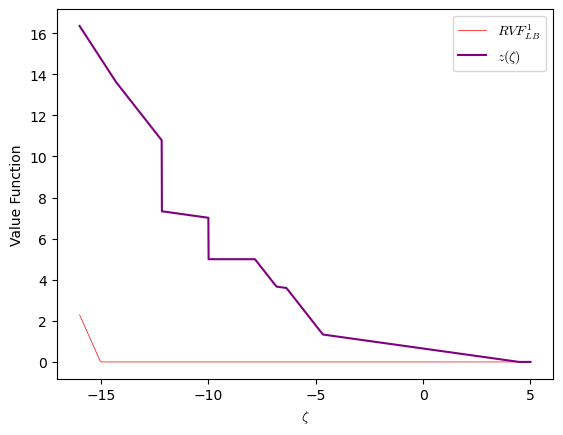

In [18]:
plot_df(-55.5, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 7.33333
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


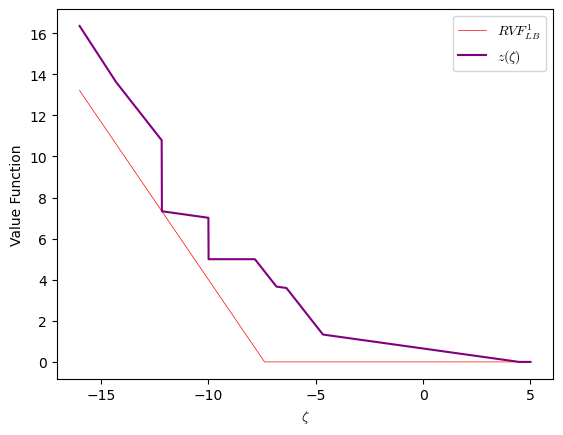

In [19]:
plot_df(-73/6, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 5.00000
RAYS
No rays!
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
0 : -0.6875000000, 1 : -0.4687500000, 4 : 0.8437500000, 6 : 11.0937500000, 7 : 2.9062500000, 8 : 11.6250000000, 10 : 9.4375000000, 
------------------------
DISJUNCTION
Only root node in the B&B Tree!
Feasibility Status: FEASIBLE_PRUNED


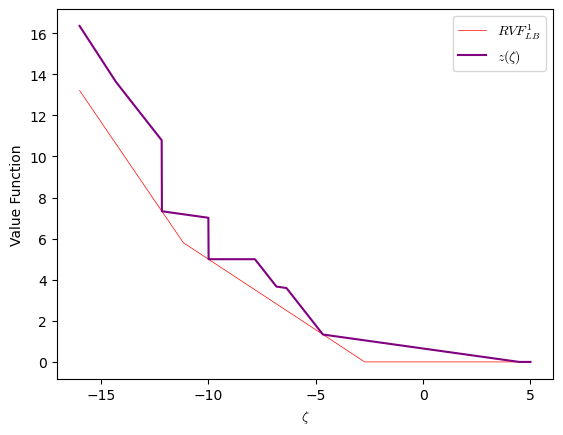

In [20]:
plot_df(-10, zeta_lst, rvf_lst=rvf_lst, print_df=True)

OPT OBJ: 7.16260
RAYS
0.1351817727 0.1577120682 0.6083179772 0.7660300454 -0.2928938409 6.1507706587 2.7712263407 0.0000000000 0.4506059091 0.0000000000 -0.0000000000 
------------------------
DUAL SOLUTIONS + REDUCED COSTS 
4 : 2.0000000000, 5 : 5.0000000000, 7 : 7.0000000000, 8 : 10.0000000000, 9 : 2.0000000000, 10 : 10.0000000000, 
------------------------
0 : -2.3529411765, 1 : -2.4117647059, 2 : -4.5882352941, 4 : -2.7647058824, 5 : 14.0588235294, 6 : 45.2352941176, 8 : 17.1764705882, 
------------------------
0 : -1.5339805825, 1 : -1.4563106796, 2 : -0.9029126214, 4 : -0.9902912621, 6 : 28.4466019417, 8 : 14.4466019417, 10 : 4.6407766990, 
------------------------
0 : -0.6875000000, 1 : -0.4687500000, 4 : 0.8437500000, 6 : 11.0937500000, 7 : 2.9062500000, 8 : 11.6250000000, 10 : 9.4375000000, 
------------------------
0 : -1.0769230769, 1 : -0.9230769231, 3 : -0.4153846154, 6 : 19.0769230769, 7 : 1.1538461538, 8 : 12.9230769231, 10 : 7.6461538462, 
------------------------
0 : -

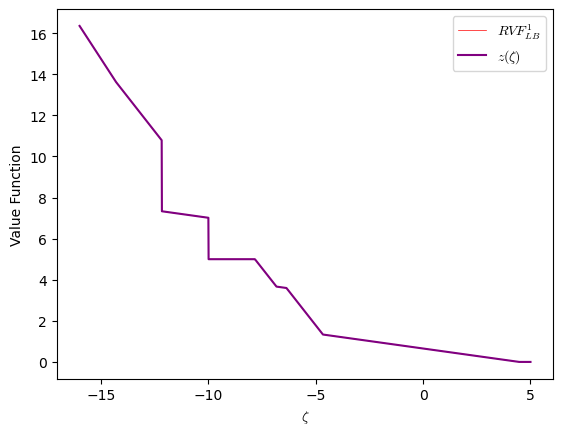

In [21]:
plot_df(-11, zeta_lst, rvf_lst=rvf_lst, print_df=True)